In [1]:
import numpy as np
import pandas as pd
import os,glob
import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,  GlobalAveragePooling2D,BatchNormalization
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l2


In [2]:
path = './archive/plantvillage dataset/color'
train_dataset , test_dataset = keras.utils.image_dataset_from_directory(
    path ,
    image_size=(224,224),
    batch_size=32 ,
    seed = 123 ,
    validation_split=.2,
    subset='both'
)

Found 54305 files belonging to 38 classes.
Using 43444 files for training.
Using 10861 files for validation.


In [3]:
classes = train_dataset.class_names
classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

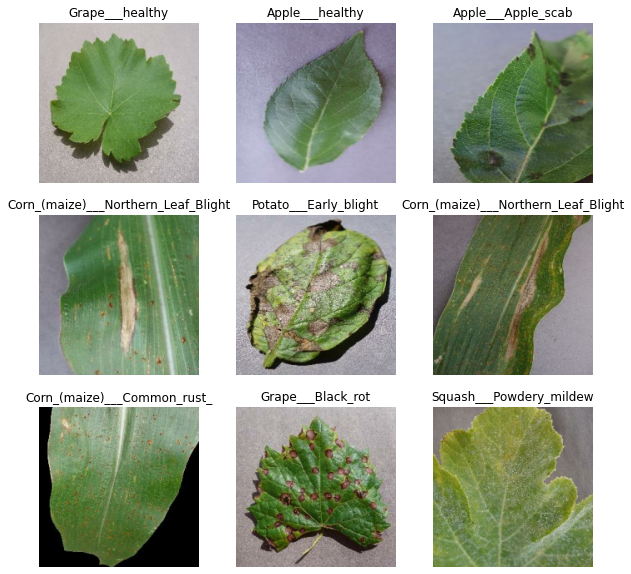

In [4]:
#Data Visualization
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classes[labels[i]])
        plt.axis("off")
plt.show()

In [5]:
# #Data Augmentation
#we tried data augmentation but it was not working well, so we decided to not include it.


# data_augmentation = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# def apply_augmentation(x, y):
#     augmented_images = data_augmentation.flow(np.expand_dims(x, axis=0), batch_size=32)
#     augmented_images = augmented_images[0, 0]  # Remove the extra batch dimension
#     return augmented_images, y

# # Display augmented images
# plt.figure(figsize=(10, 10))
# for images, _ in train_dataset.take(1):
#     augmented_images = data_augmentation.flow(images, batch_size=9)
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(augmented_images.next()[0].astype("uint8"))
#         plt.axis("off")
# plt.show()

In [6]:
#Builiding the model
model_modified = Sequential()
model_modified.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model_modified.add(MaxPooling2D(2, 2))
model_modified.add(Conv2D(128, (3, 3), activation='relu'))
model_modified.add(MaxPooling2D(2, 2))
model_modified.add(Conv2D(256, (3, 3), activation='relu')) 
model_modified.add(MaxPooling2D(2, 2))
model_modified.add(GlobalAveragePooling2D())
model_modified.add(Dense(512, activation='relu'))
model_modified.add(Dropout(0.6))  
model_modified.add(Dense(len(classes), activation='softmax'))


model_modified.compile(
    optimizer = 'adam' ,
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

In [7]:
model_modified.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 256)       0

In [8]:

# use_data_augmentation = True
# augmented_train_dataset = train_dataset.map(
#     lambda x, y: tf.numpy_function(apply_augmentation, [x, y], [tf.float32, y.dtype])
# )

epochs =5
    
history = model_modified.fit(
    train_dataset,
    epochs=epochs,
)


Epoch 1/5


1358/1358 [==============================] - 2226s 2s/step - loss: 2.1443 - accuracy: 0.4148
Epoch 2/5
1358/1358 [==============================] - 2206s 2s/step - loss: 1.0568 - accuracy: 0.6831
Epoch 3/5
1358/1358 [==============================] - 2214s 2s/step - loss: 0.6744 - accuracy: 0.7925
Epoch 4/5
1358/1358 [==============================] - 2388s 2s/step - loss: 0.4770 - accuracy: 0.8513
Epoch 5/5
1358/1358 [==============================] - 2421s 2s/step - loss: 0.3774 - accuracy: 0.8823


In [9]:
test_loss, test_acc = model_modified.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")
 

340/340 [==============================] - 137s 403ms/step - loss: 0.2624 - accuracy: 0.9157
Test accuracy: 0.9156615138053894


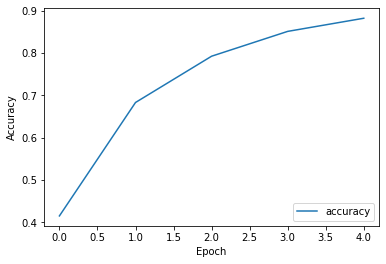

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


340/340 [==============================] - 125s 367ms/step - loss: 0.2624 - accuracy: 0.9157
Test accuracy: 0.9156615138053894
340/340 [==============================] - 134s 394ms/step
Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.88      0.71      0.78       120
                                 Apple___Black_rot       0.93      0.95      0.94       124
                          Apple___Cedar_apple_rust       0.98      0.82      0.89        56
                                   Apple___healthy       0.84      0.93      0.88       348
                               Blueberry___healthy       0.96      0.99      0.97       318
          Cherry_(including_sour)___Powdery_mildew       0.92      0.89      0.91       208
                 Cherry_(including_sour)___healthy       0.72      0.91      0.80       147
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot    

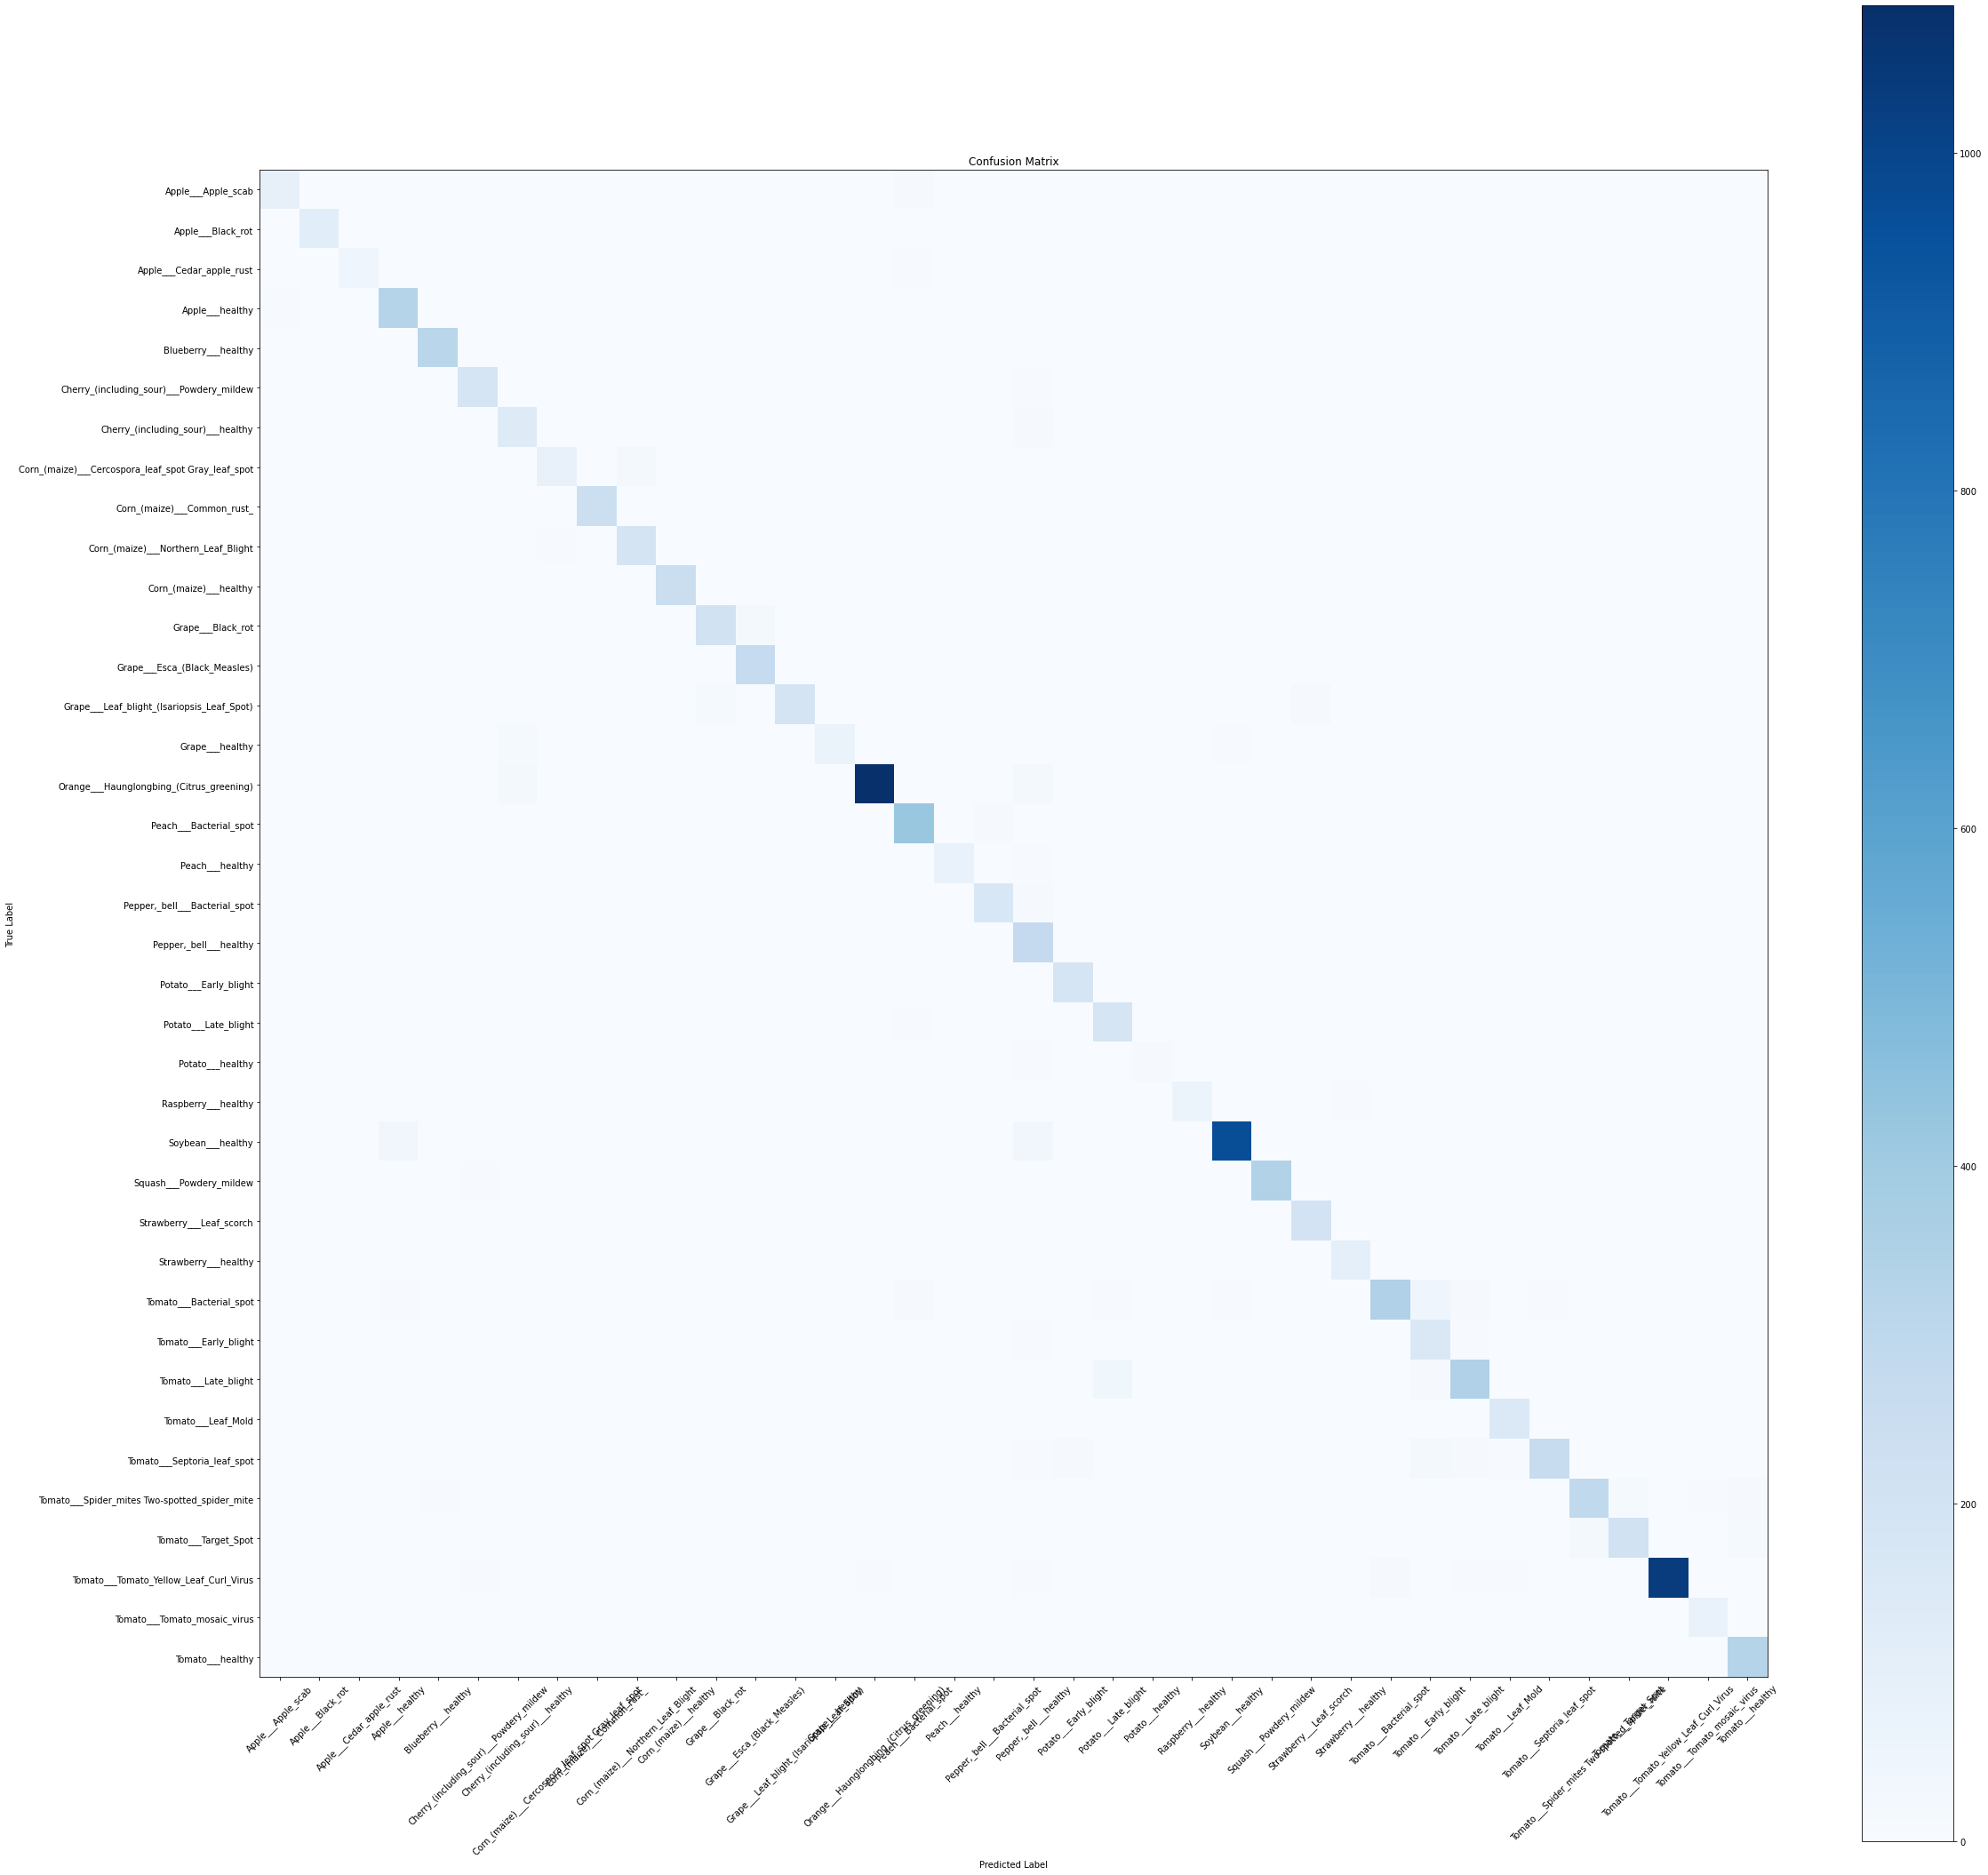

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

test_loss, test_acc = model_modified.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

predictions = model_modified.predict(test_dataset)
predicted_labels = np.argmax(predictions, axis=1)

true_labels = np.concatenate([y for x, y in test_dataset], axis=0)

print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=classes))

conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(len(classes), len(classes)))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [11]:
model_modified.save("basic_cnn_model.h5")


C:\Users\vibhuti\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
model_modified.save("basic_cnn_model.keras")


Transfer learning using mobilenetv2


In [13]:
#Transfer learning using mobilenetv2
from keras.applications import MobileNetV2


In [14]:
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(classes), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 512)               655872    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 38)                19494     
                                                                 
Total params: 2933350 (11.19 MB)
Trainable params: 675

In [15]:
base_model.trainable = True

fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset)


Epoch 1/5
1358/1358 [==============================] - 692s 506ms/step - loss: 0.8299 - accuracy: 0.7578 - val_loss: 6.7375 - val_accuracy: 0.3794
Epoch 2/5
1358/1358 [==============================] - 677s 499ms/step - loss: 0.4039 - accuracy: 0.8744 - val_loss: 1.3738 - val_accuracy: 0.7329
Epoch 3/5
1358/1358 [==============================] - 831s 612ms/step - loss: 0.3080 - accuracy: 0.9013 - val_loss: 2.2895 - val_accuracy: 0.6228
Epoch 4/5
1358/1358 [==============================] - 976s 719ms/step - loss: 0.2442 - accuracy: 0.9228 - val_loss: 2.9782 - val_accuracy: 0.5825
Epoch 5/5
1358/1358 [==============================] - 938s 691ms/step - loss: 0.2077 - accuracy: 0.9345 - val_loss: 1.1214 - val_accuracy: 0.7698


340/340 [==============================] - 133s 392ms/step - loss: 1.1214 - accuracy: 0.7698
Test Accuracy: 76.98%


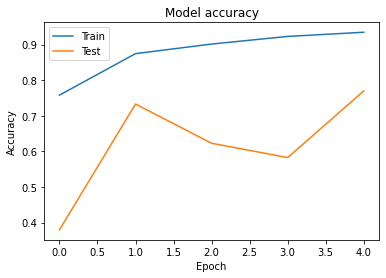

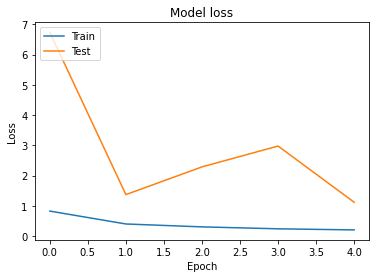

In [16]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


340/340 [==============================] - 102s 301ms/step - loss: 1.1214 - accuracy: 0.7698
Test accuracy: 0.7698186039924622
340/340 [==============================] - 194s 572ms/step
Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.88      0.71      0.78       120
                                 Apple___Black_rot       0.93      0.95      0.94       124
                          Apple___Cedar_apple_rust       0.98      0.82      0.89        56
                                   Apple___healthy       0.84      0.93      0.88       348
                               Blueberry___healthy       0.96      0.99      0.97       318
          Cherry_(including_sour)___Powdery_mildew       0.92      0.89      0.91       208
                 Cherry_(including_sour)___healthy       0.72      0.91      0.80       147
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot    

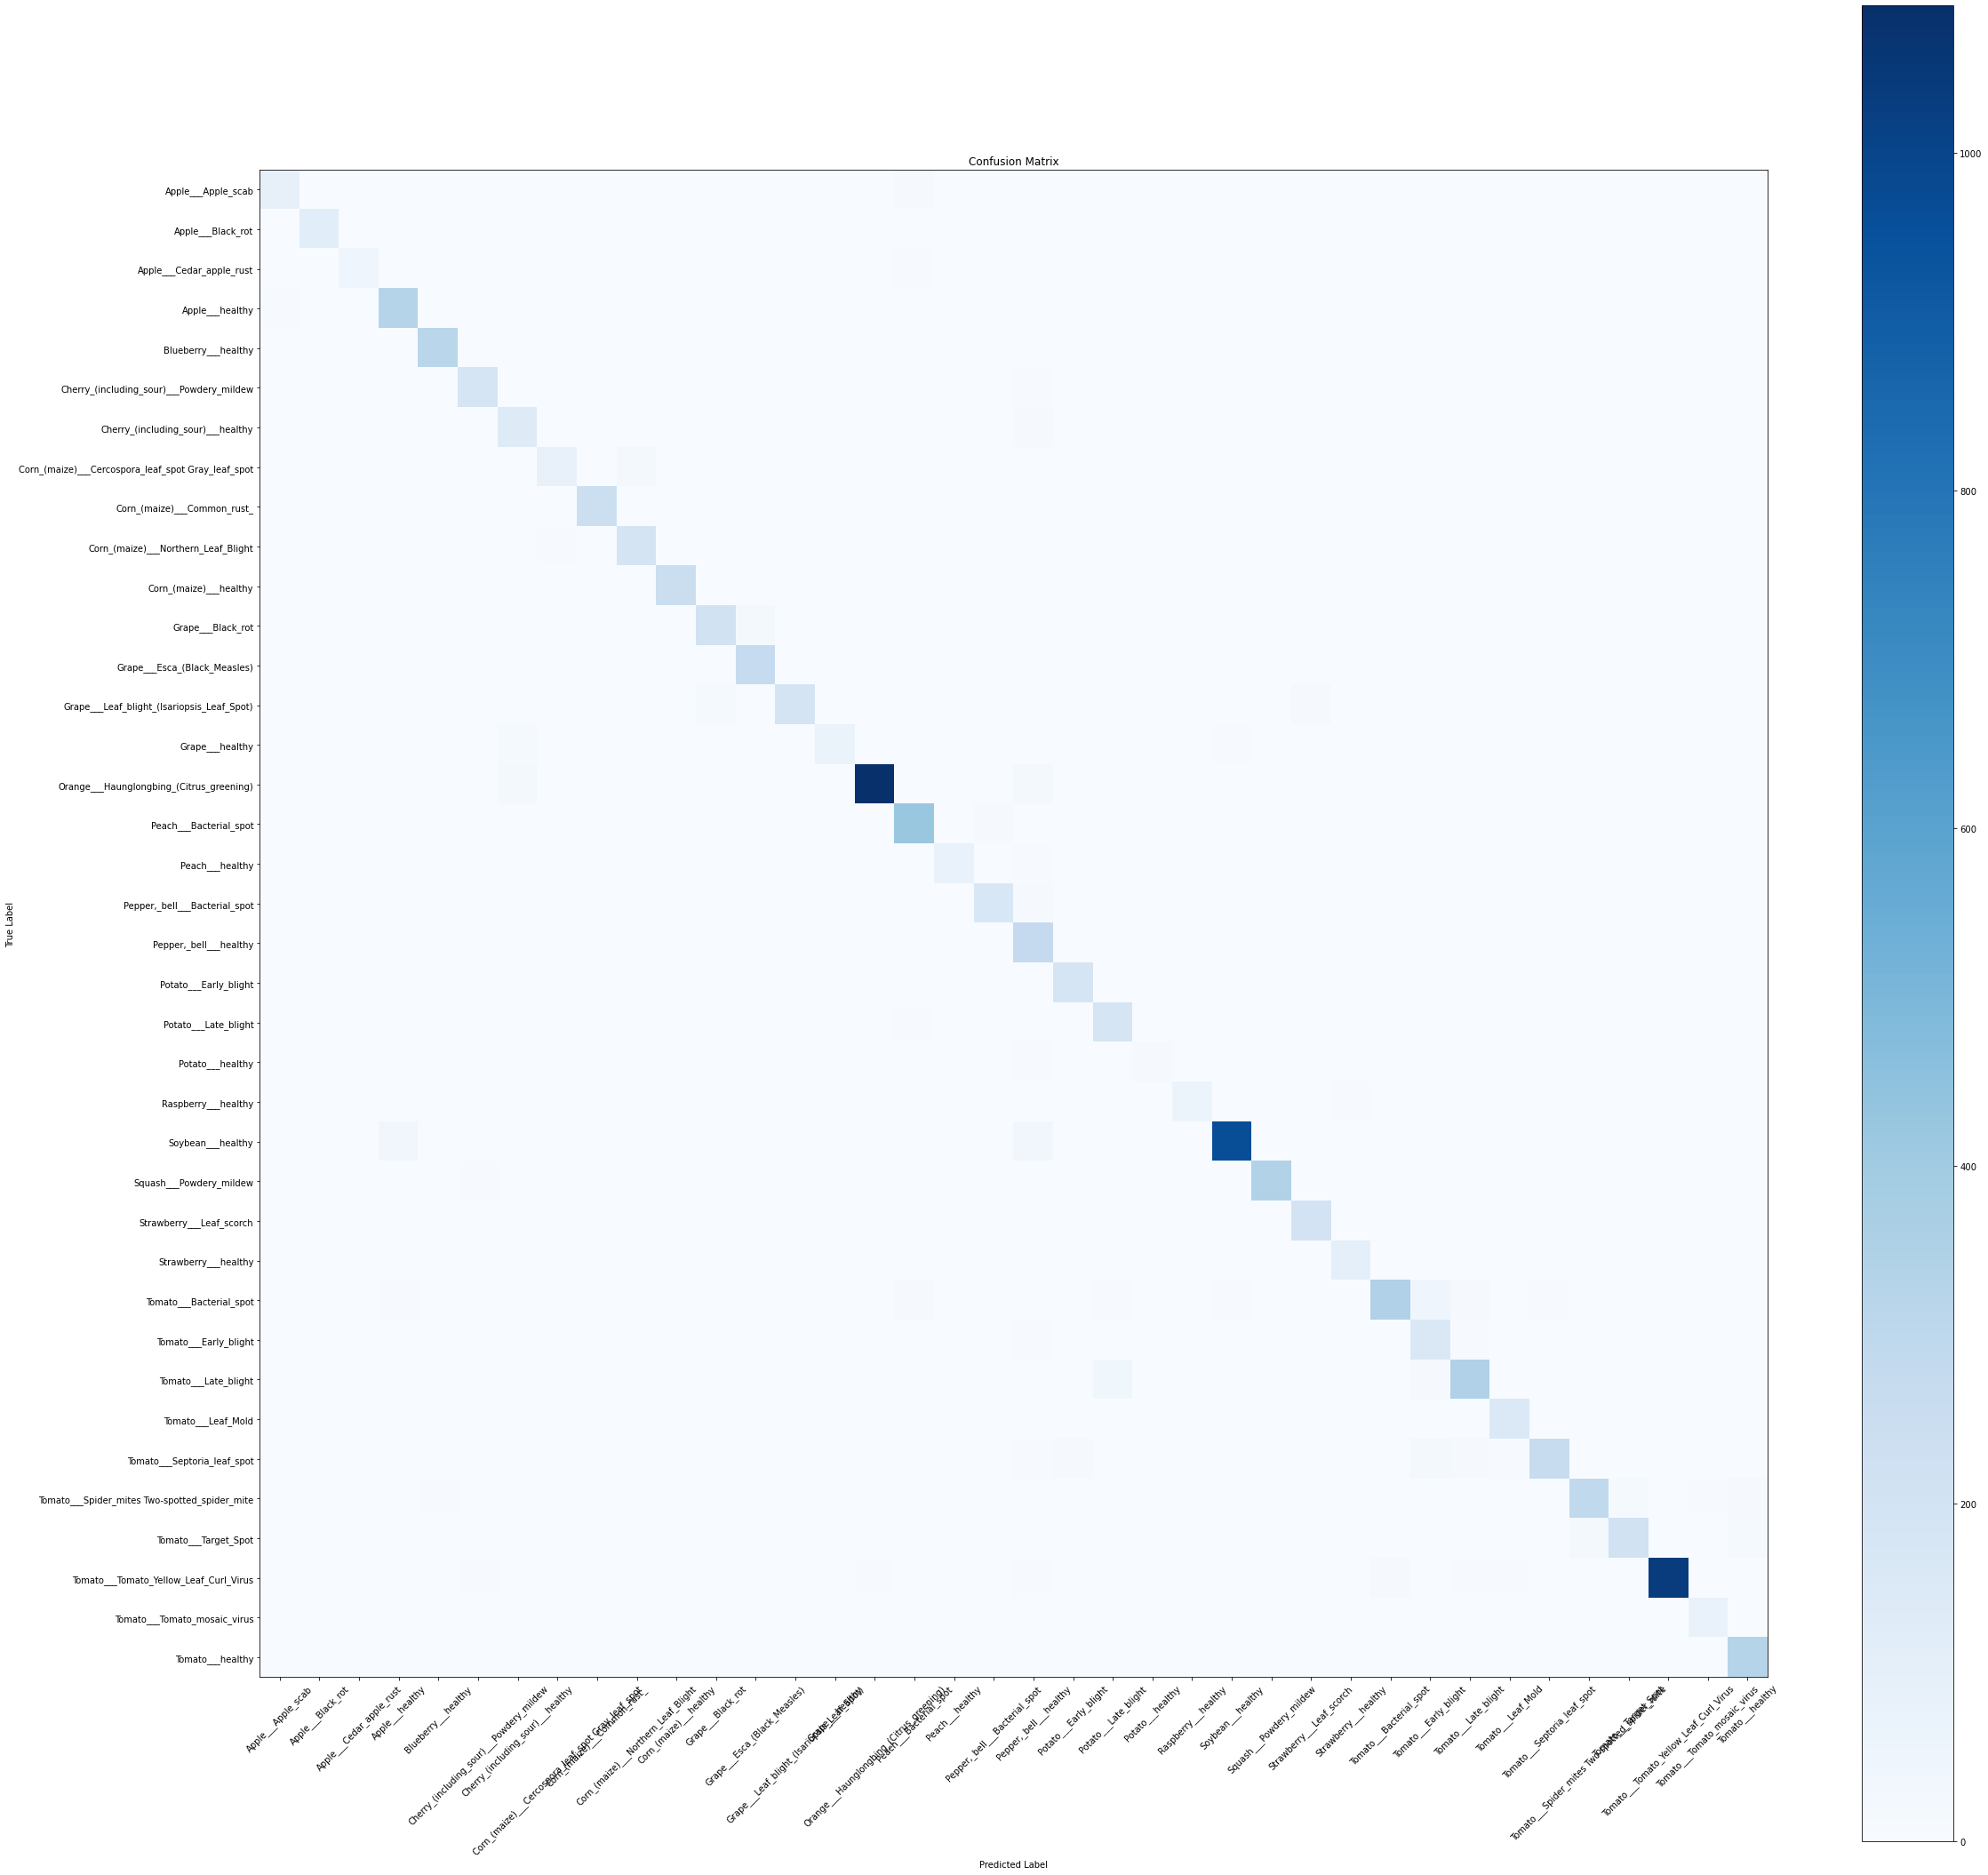

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

predictions = model_modified.predict(test_dataset)
predicted_labels = np.argmax(predictions, axis=1)

true_labels = np.concatenate([y for x, y in test_dataset], axis=0)

print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=classes))

conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(len(classes), len(classes)))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()